# Part 2 of NLP Mini-Project

## Medium blog post link here:
https://medium.com/training-convnet-on-small-binary-classified/using-word-embeddings-and-recurrent-neural-networks-to-predict-rating-scores-from-text-93ba0a48bf82

In [6]:
from collections import Counter
from datetime import datetime
 
import json
 
from keras.layers import Embedding, LSTM, Dense, Conv1D, MaxPooling1D, Dropout, Activation
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
 
import numpy as np

t1 = datetime.now()
with open("yelp_data/dataset/review.json") as f:
    reviews = f.read().strip().split("\n")
reviews = [json.loads(review) for review in reviews]
print(datetime.now() - t1)

0:01:55.590567


In [7]:
texts = [review['text'] for review in reviews]

binstars = [0 if review['stars'] <= 3 else 1 for review in reviews]
bin_texts = []
bin_labels = []
limit = 100000  # Change this to grow/shrink the dataset
neg_pos_counts = [0, 0]
for i in range(len(texts)):
    polarity = binstars[i]
    if neg_pos_counts[polarity] < limit:
        bin_texts.append(texts[i])
        bin_labels.append(binstars[i])
        neg_pos_counts[polarity] += 1

In [8]:
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(bin_texts)
sequences = tokenizer.texts_to_sequences(bin_texts)
data = pad_sequences(sequences, maxlen=300)

In [4]:
model = Sequential()
model.add(Embedding(20000, 128, input_length=300))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'],)
print(len(bin_labels))

200000


In [5]:
history=model.fit(data, np.array(bin_labels), validation_split=0.5, epochs=10)

Train on 100000 samples, validate on 100000 samples
Epoch 1/10
100000/100000 [==============================] - 2822s 28ms/step - loss: 0.3316 - acc: 0.8617 - val_loss: 0.2952 - val_acc: 0.8730
Epoch 2/10
100000/100000 [==============================] - 2838s 28ms/step - loss: 0.2502 - acc: 0.9001 - val_loss: 0.3170 - val_acc: 0.8708
Epoch 3/10
100000/100000 [==============================] - 2887s 29ms/step - loss: 0.2285 - acc: 0.9093 - val_loss: 0.2756 - val_acc: 0.8844
Epoch 4/10
100000/100000 [==============================] - 2854s 29ms/step - loss: 0.2141 - acc: 0.9154 - val_loss: 0.2878 - val_acc: 0.8717
Epoch 5/10
100000/100000 [==============================] - 2794s 28ms/step - loss: 0.2039 - acc: 0.9203 - val_loss: 0.2743 - val_acc: 0.8900
Epoch 6/10
100000/100000 [==============================] - 2837s 28ms/step - loss: 0.1928 - acc: 0.9256 - val_loss: 0.2493 - val_acc: 0.8947
Epoch 7/10
100000/100000 [==============================] - 2787s 28ms/step - loss: 0.1855 - acc

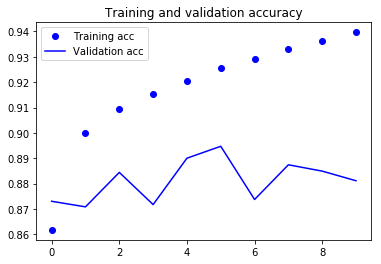

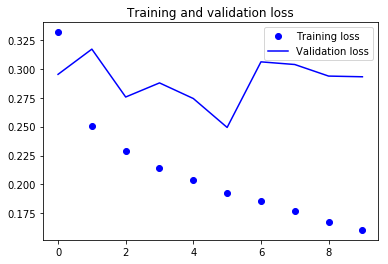

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl

acc = [0.8617, 0.9001, 0.9093, 0.9154, 0.9203, 0.9256, 0.9291, 0.9329, 0.9364, 0.9397]
val_acc = [0.8730, 0.8708, 0.8844, 0.8717, 0.8900, 0.8947, 0.8737, 0.8874, 0.8849, 0.8811]
loss = [0.3316, 0.2502, 0.2285, 0.2141, 0.2039, 0.1928, 0.1855, 0.1768, 0.1678, 0.1607]
val_loss = [0.2952, 0.3170, 0.2756, 0.2878, 0.2743, 0.2493, 0.3060, 0.3037, 0.2937, 0.2931]

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [9]:
from keras.layers import Bidirectional

model = Sequential()
model.add(Embedding(20000, 128, input_length=300))
model.add(Bidirectional(LSTM(64,dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history=model.fit(data, np.array(bin_labels), validation_split=0.4, epochs=10, batch_size=128)

Train on 120000 samples, validate on 80000 samples
Epoch 1/10
120000/120000 [==============================] - 600s 5ms/step - loss: 0.3356 - acc: 0.8581 - val_loss: 0.3254 - val_acc: 0.8651
Epoch 2/10
120000/120000 [==============================] - 596s 5ms/step - loss: 0.2618 - acc: 0.8957 - val_loss: 0.3395 - val_acc: 0.8552
Epoch 3/10
120000/120000 [==============================] - 595s 5ms/step - loss: 0.2379 - acc: 0.9056 - val_loss: 0.3942 - val_acc: 0.8355
Epoch 4/10
120000/120000 [==============================] - 595s 5ms/step - loss: 0.2206 - acc: 0.9131 - val_loss: 0.2813 - val_acc: 0.8830
Epoch 5/10
120000/120000 [==============================] - 595s 5ms/step - loss: 0.2097 - acc: 0.9181 - val_loss: 0.2760 - val_acc: 0.8922
Epoch 6/10
120000/120000 [==============================] - 595s 5ms/step - loss: 0.1995 - acc: 0.9220 - val_loss: 0.3439 - val_acc: 0.8518
Epoch 7/10
120000/120000 [==============================] - 595s 5ms/step - loss: 0.1896 - acc: 0.9261 - val_

/nbu/people/knoh1/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


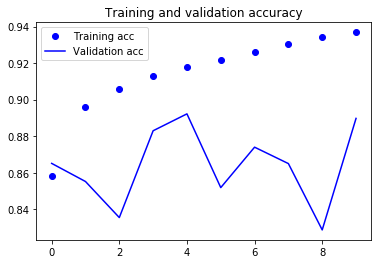

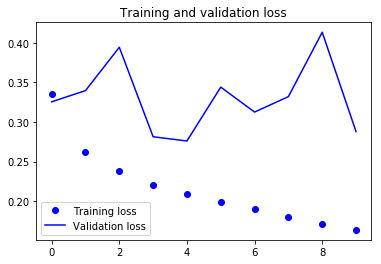

In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()